In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import csv
import math
from csv import writer

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

inWidth = 368
inHeight = 368
inScale = 1

thr = 0.2

BODY_PARTS = {"Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
              "LEye": 15, "REar": 16, "LEar": 17, "Background": 18}

POSE_PAIRS = [["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
              ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
              ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"]]

#Import image

#img = cv.imread("pose.png")
#plt.imshow(img)
#plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inp = cv.dnn.blobFromImage(frame, inScale, (inWidth, inHeight),
                               (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inp)
    out = net.forward()

    assert (len(BODY_PARTS) <= out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert (partFrom in BODY_PARTS)
        assert (partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return frame



#estimated_image = pose_estimation(img)
#plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

#Video
vidcoordinates = []
vidvalue = []
vidnames=[]
namessubjects = ['Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
                vidnames.append(f'Benataxi {i} - {j} - {k+1}.mp4')
print(vidnames)
#vidnamess = ['Pares i arm right 3 - 1080 50fps - 1_Trim.mp4', 'Pares i arm right 3 - 1080 50fps - 2_Trim.mp4']
#vidnamess = ['nataliepeka1_1_20.mp4', 'nataliepeka1_4_20.mp4']
counter = 0
for i in vidnames:
    print(i)
    if counter == 10:
        counter = 0
    counter += 1
    if "Elsa" in i or "Oskar" in i:
        if counter <= 5:
            counter2 = counter + 5
        if counter > 5:
            counter2 = counter - 5
    else:
        counter2 = counter
    print(counter2)
    allpoints = []
    cap = cv.VideoCapture(i)
    cap.set(3, 800)
    cap.set(4, 800)

    if not cap.isOpened():
        cap = cv.VideoCapture(0)
    if not cap.isOpened():
        raise IOError('Cannot open video')
    while cv.waitKey(1) < 0:
        hasFrame, frame = cap.read()
        if not hasFrame:
            cv.waitKey()
            break
        frameWidth = frame.shape[1]
        frameHeight = frame.shape[0]
        inp = cv.dnn.blobFromImage(frame, inScale, (inWidth, inHeight),
                                   (0, 0, 0), swapRB=False, crop=False)
        net.setInput(inp)
        out = net.forward()

        assert (len(BODY_PARTS) <= out.shape[1])

        points = []
        for i in range(len(BODY_PARTS)):
            # Slice heatmap of corresponding body's part.
            heatMap = out[0, i, :, :]

            # Originally, we try to find all the local maximums. To simplify a sample
            # we just find a global one. However only a single pose at the same time
            # could be detected this way.
            _, conf, _, point = cv.minMaxLoc(heatMap)
            x = (frameWidth * point[0]) / out.shape[3]
            y = (frameHeight * point[1]) / out.shape[2]

            # Add a point if it's confidence is higher than threshold.
            points.append((int(x), int(y)) if conf > thr else None)

        for pair in POSE_PAIRS:
            partFrom = pair[0]
            partTo = pair[1]
            assert (partFrom in BODY_PARTS)
            assert (partTo in BODY_PARTS)

            idFrom = BODY_PARTS[partFrom]
            idTo = BODY_PARTS[partTo]

            if points[idFrom] and points[idTo]:
                cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
                cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
                cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

        t, _ = net.getPerfProfile()
        freq = cv.getTickFrequency() / 2000
        cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
        #print(points)
        #cv.imshow('Pose estimation Tutorial', frame)
        if points[10] is not None and points[12] is not None and counter2 <= 5:
                dist = math.sqrt((points[10][1]-points[12][1])**2+(points[10][0]-points[12][0])**2)
                allpoints.append(dist) 
        if points[9] is not None and points[13] is not None and counter2 > 5:
                dist = math.sqrt((points[13][1]-points[9][1])**2+(points[13][0]-points[9][0])**2)
                allpoints.append(dist)
    print(allpoints)
    with open('vidcoordinates_openpose_ataxi_ben.csv', 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(allpoints)
        f_object.close()
#print(vidcoordinates)

['Benataxi 0 - Andrei - 1.mp4', 'Benataxi 0 - Andrei - 2.mp4', 'Benataxi 0 - Andrei - 3.mp4', 'Benataxi 0 - Andrei - 4.mp4', 'Benataxi 0 - Andrei - 5.mp4', 'Benataxi 0 - Andrei - 6.mp4', 'Benataxi 0 - Andrei - 7.mp4', 'Benataxi 0 - Andrei - 8.mp4', 'Benataxi 0 - Andrei - 9.mp4', 'Benataxi 0 - Andrei - 10.mp4', 'Benataxi 0 - Elsa - 1.mp4', 'Benataxi 0 - Elsa - 2.mp4', 'Benataxi 0 - Elsa - 3.mp4', 'Benataxi 0 - Elsa - 4.mp4', 'Benataxi 0 - Elsa - 5.mp4', 'Benataxi 0 - Elsa - 6.mp4', 'Benataxi 0 - Elsa - 7.mp4', 'Benataxi 0 - Elsa - 8.mp4', 'Benataxi 0 - Elsa - 9.mp4', 'Benataxi 0 - Elsa - 10.mp4', 'Benataxi 0 - Nathalie - 1.mp4', 'Benataxi 0 - Nathalie - 2.mp4', 'Benataxi 0 - Nathalie - 3.mp4', 'Benataxi 0 - Nathalie - 4.mp4', 'Benataxi 0 - Nathalie - 5.mp4', 'Benataxi 0 - Nathalie - 6.mp4', 'Benataxi 0 - Nathalie - 7.mp4', 'Benataxi 0 - Nathalie - 8.mp4', 'Benataxi 0 - Nathalie - 9.mp4', 'Benataxi 0 - Nathalie - 10.mp4', 'Benataxi 0 - Oskar - 1.mp4', 'Benataxi 0 - Oskar - 2.mp4', 'Benat

[172.6267650163207, 189.0952141118331, 207.60780332155147, 172.6267650163207, 172.6267650163207, 172.6267650163207, 172.6267650163207, 172.6267650163207, 157.20050890502867, 172.6267650163207, 172.6267650163207, 157.20050890502867, 157.20050890502867, 172.6267650163207, 189.0952141118331, 164.12495239907915, 205.91260281974002, 205.91260281974002, 205.91260281974002, 205.91260281974002, 184.26068490049633, 185.15128949051368, 205.91260281974002, 205.91260281974002, 205.91260281974002, 164.12495239907915, 164.12495239907915, 126.0, 144.138821973818, 128.08200498118384, 144.138821973818, 84.0, 87.36131867136622, 87.36131867136622, 87.36131867136622, 84.0, 48.373546489791295, 147.12239802287073]
Benataxi 0 - Elsa - 4.mp4
9
[172.6267650163207, 172.6267650163207, 189.0952141118331, 172.6267650163207, 189.0952141118331, 206.81392603013947, 184.26068490049633, 205.91260281974002, 157.20050890502867, 205.91260281974002, 181.46625030566977, 181.46625030566977, 185.15128949051368, 185.1512894905

[204.48227307030797, 204.48227307030797, 204.48227307030797, 204.48227307030797, 218.56349191939628, 191.637678967368, 191.637678967368, 191.637678967368, 181.46625030566977, 266.6477076593759, 266.6477076593759, 266.6477076593759, 246.61711213944582, 173.4877517290486, 246.61711213944582, 205.91260281974002, 205.91260281974002, 168.57639217873896, 284.96491012052695, 284.96491012052695, 164.12495239907915, 147.12239802287073, 141.0, 261.2374398894615, 261.2374398894615, 258.0, 235.0, 123.97580409095961, 146.84004903295286, 212.0, 212.0, 146.84004903295286, 118.0, 169.04733065032408, 146.84004903295286, 146.84004903295286, 146.84004903295286, 212.0, 146.84004903295286, 146.84004903295286, 117.0, 124.91997438360288, 102.55242561733974, 124.91997438360288, 124.91997438360288, 102.55242561733974, 169.04733065032408, 102.55242561733974, 102.55242561733974, 124.91997438360288, 124.91997438360288, 124.91997438360288, 124.91997438360288, 102.55242561733974, 124.91997438360288, 124.91997438360

[218.56349191939628, 204.48227307030797, 226.3183598385248, 226.3183598385248, 226.3183598385248, 226.3183598385248, 226.3183598385248, 245.75801105966008, 226.3183598385248, 245.75801105966008, 245.75801105966008, 245.75801105966008, 245.75801105966008, 226.3183598385248, 226.3183598385248, 226.3183598385248, 184.26068490049633, 185.15128949051368, 164.12495239907915, 125.25174649480941, 125.25174649480941, 144.26711336961034, 102.95630140987001, 144.26711336961034, 144.26711336961034, 144.26711336961034, 144.26711336961034, 144.26711336961034, 144.26711336961034, 144.26711336961034, 144.26711336961034, 109.34349546269316, 109.34349546269316, 109.34349546269316, 109.34349546269316, 262.3833073958784, 109.34349546269316, 109.98636279102969, 109.34349546269316, 109.34349546269316, 109.34349546269316, 109.34349546269316, 126.0634760745554]
Benataxi 0 - Oskar - 1.mp4
6
[327.9054741842533, 327.9054741842533, 327.9054741842533, 327.9054741842533, 327.9054741842533, 296.98821525441036, 327.9

[296.98821525441036, 296.98821525441036, 296.98821525441036, 314.4932431706602, 314.4932431706602, 288.294987816299, 234.76371099469355, 234.76371099469355, 218.56349191939628, 218.56349191939628, 218.56349191939628, 189.0952141118331, 157.20050890502867, 157.20050890502867, 157.20050890502867, 144.03124660989366, 126.0634760745554, 144.03124660989366, 144.03124660989366, 144.84474446799925, 144.84474446799925, 144.84474446799925, 144.84474446799925, 164.12495239907915, 189.0952141118331, 189.0952141118331, 189.0952141118331, 164.12495239907915, 184.26068490049633, 184.26068490049633, 184.26068490049633, 170.26156348395253, 170.26156348395253, 118.0, 118.0, 125.25174649480941, 109.34349546269316, 109.34349546269316, 141.0, 109.34349546269316, 109.34349546269316, 109.34349546269316, 96.25487000666512, 147.12239802287073, 125.25174649480941, 141.0, 165.0, 141.0, 141.0, 125.25174649480941, 125.25174649480941, 125.25174649480941, 141.0, 141.0, 141.0, 144.84474446799925, 251.2866888635369, 

[314.4932431706602, 327.9054741842533, 327.9054741842533, 327.9054741842533, 314.4932431706602, 297.6995129320839, 314.4932431706602, 297.6995129320839, 297.6995129320839, 269.8758974047145, 251.46172671005024, 251.46172671005024, 225.7631502260721, 225.7631502260721, 225.7631502260721, 206.20620747203515, 188.43035848822237, 163.6154026979123, 183.8069639594757, 163.6154026979123, 163.6154026979123, 261.3962509295036, 238.72368964977062, 282.0, 282.0, 238.72368964977062, 238.72368964977062, 147.12239802287073, 282.0, 238.72368964977062, 261.3962509295036, 238.72368964977062, 238.72368964977062, 262.3833073958784, 261.3962509295036, 238.72368964977062, 261.3962509295036, 261.3962509295036, 261.3962509295036, 261.3962509295036, 261.3962509295036, 238.72368964977062, 261.3962509295036, 238.72368964977062, 238.72368964977062, 261.3962509295036, 238.72368964977062, 238.72368964977062, 238.72368964977062, 238.72368964977062, 261.3962509295036, 238.72368964977062, 216.1203368496357, 192.6343

[327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 314.4932431706602, 296.98821525441036, 327.14064253773176, 296.98821525441036, 296.98821525441036, 281.1138559374119, 281.1138559374119, 265.6633207652121, 234.06195760951843, 218.56349191939628, 251.05577069647293, 251.05577069647293, 251.05577069647293, 255.36248745655655, 156.40012787718558, 181.077331546497, 156.40012787718558, 203.90684147423792, 125.39936203984452, 144.26711336961034, 125.39936203984452, 171.89822570346675, 125.39936203984452, 125.39936203984452, 171.89822570346675, 164.12495239907915, 147.12239802287073, 144.26711336961034, 164.12495239907915, 171.89822570346675, 171.89822570346675, 156.40012787718558, 171.21331723905124, 147.12239802287073, 147.12239802287073, 147.12239802287073, 147.12239802287073, 147.12239802287073, 147.12239802287073, 144.84474446799925, 171.89822570346675, 126.0634760745554, 164.12

[314.4932431706602, 314.4932431706602, 314.4932431706602, 332.8092546790128, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 332.8092546790128, 314.4932431706602, 332.8092546790128, 314.4932431706602, 314.4932431706602, 281.1138559374119, 296.98821525441036, 314.4932431706602, 332.8092546790128, 297.6995129320839, 297.6995129320839, 297.6995129320839, 297.6995129320839, 281.1138559374119, 281.1138559374119, 296.98821525441036, 296.98821525441036, 205.91260281974002, 206.20620747203515, 225.7631502260721, 245.246814454337, 266.1766330841233, 287.5865087238968]
Benataxi 1 - Andrei - 3.mp4
3
[351.0056979594491, 351.0056979594491, 332.8092546790128, 351.0056979594491, 351.0056979594491, 332.8092546790128, 314.4932431706602, 332.8092546790128, 332.8092546790128, 332.8092546790128, 314.4932431706602, 296.98821525441036, 314.4932431706602, 296.98821525441036, 332.8092546790128, 314.4932431706602, 332.8092546790128, 314.4932431706602, 296.98821525441036, 314.4932431

[171.9447585708852, 171.9447585708852, 189.0952141118331, 203.90684147423792, 203.90684147423792, 203.90684147423792, 171.9447585708852, 184.26068490049633, 184.26068490049633, 157.20050890502867, 184.26068490049633, 184.26068490049633, 164.12495239907915, 184.26068490049633, 206.20620747203515, 188.43035848822237, 173.4877517290486, 168.57639217873896, 168.57639217873896, 168.57639217873896, 118.0, 118.0, 94.0, 102.95630140987001, 102.95630140987001, 94.0]
Benataxi 1 - Elsa - 5.mp4
10
[188.43035848822237, 188.43035848822237, 171.21331723905124, 144.03124660989366, 144.03124660989366, 164.12495239907915, 164.12495239907915, 144.03124660989366, 144.03124660989366, 144.03124660989366, 170.26156348395253, 147.12239802287073, 147.12239802287073, 156.40012787718558, 171.89822570346675, 126.0634760745554, 184.69975636150687, 170.26156348395253, 109.98636279102969, 170.26156348395253, 147.12239802287073, 147.12239802287073, 125.0, 143.45033983926285, 143.45033983926285, 117.0, 117.0, 86.12781

[296.99831649354513, 269.8758974047145, 269.8758974047145, 288.294987816299, 269.8758974047145, 269.8758974047145, 288.294987816299, 269.09106265351886, 269.09106265351886, 251.46172671005024, 251.46172671005024, 234.76371099469355, 234.76371099469355, 234.76371099469355, 189.0952141118331, 189.0952141118331, 172.6267650163207, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 189.0952141118331, 203.90684147423792, 203.90684147423792, 203.90684147423792, 203.90684147423792, 203.90684147423792, 203.90684147423792, 203.90684147423792, 203.90684147423792, 189.0952141118331, 189.0952141118331, 171.9447585708852, 189.0952141118331, 171.9447585708852, 171.9447585708852, 171.9447585708852, 171.9447585708852, 171.9447585708852, 171.9447585708852, 157.20050890502867, 157.20050890502867, 157.20050890502867, 157.20050890502867, 126.0634760745554, 126.06347607

[394.3665807342199, 394.3665807342199, 413.20817997711515, 394.3665807342199, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 359.25478424093393, 327.7865158910598, 327.7865158910598, 343.11076928595526, 313.8295715830489, 296.2853354454115, 265.4976459405996, 390.50992304933817, 390.50992304933817, 390.50992304933817, 389.60621144945827, 373.53580818979054, 267.0880004792428, 296.2853354454115, 228.25424421026653, 228.25424421026653, 191.637678967368, 191.637678967368, 191.637678967368, 143.45033983926285, 143.45033983926285, 143.45033983926285, 143.45033983926285, 125.39936203984452, 143.45033983926285, 188.43035848822237, 207.0024154448445, 188.43035848822237, 206.20620747203515, 206.20620747203515, 206.20620747203515, 206.20620747203515, 206.20620747203515, 206.20620747203515, 206.20620747203515, 206.20620747203515, 109.22453936730518, 95.38343671728336, 143.75673897247393, 133.5440002396214, 125.39936203984452, 125.39936203984452, 144.26711336961034

[205.91260281974002, 164.12495239907915, 144.03124660989366, 184.26068490049633, 188.43035848822237, 184.26068490049633, 184.26068490049633, 205.91260281974002, 205.91260281974002, 184.26068490049633, 184.26068490049633, 184.26068490049633, 144.84474446799925, 144.03124660989366, 144.03124660989366, 144.03124660989366, 144.03124660989366, 144.03124660989366, 144.03124660989366, 144.03124660989366, 144.03124660989366, 126.0634760745554, 126.0634760745554, 164.12495239907915, 164.12495239907915, 144.84474446799925, 133.5440002396214, 96.25487000666512, 96.25487000666512, 96.25487000666512, 84.0, 143.26548781894402, 87.09190547921202, 87.09190547921202, 133.5440002396214, 109.22453936730518, 164.12495239907915, 171.89822570346675, 171.89822570346675, 127.283148923964, 127.283148923964, 95.38343671728336, 86.40023148117139, 169.29264603047588, 169.29264603047588, 147.12239802287073, 147.12239802287073, 147.12239802287073, 147.12239802287073, 147.12239802287073, 147.12239802287073, 147.1223

[287.020905161976, 299.5413160150032, 312.80025575437116, 312.80025575437116, 299.5413160150032, 299.5413160150032, 299.5413160150032, 299.5413160150032, 327.7865158910598, 343.11076928595526, 343.11076928595526, 327.14064253773176, 312.80025575437116, 312.80025575437116, 312.80025575437116, 298.9916386790774, 295.758347304011, 300.273208928136, 295.758347304011, 295.758347304011, 254.37963754986365, 295.758347304011, 239.52035404115452, 251.05577069647293, 259.88651369395836, 254.37963754986365, 251.14935795259362, 251.14935795259362, 250.0, 251.14935795259362, 250.0, 251.14935795259362, 250.0, 156.40012787718558, 171.89822570346675, 171.21331723905124, 156.40012787718558, 171.21331723905124, 156.40012787718558, 156.40012787718558, 156.40012787718558, 171.89822570346675, 171.89822570346675, 156.40012787718558, 171.89822570346675, 156.40012787718558, 156.40012787718558, 171.89822570346675, 171.89822570346675, 171.89822570346675, 156.40012787718558, 171.89822570346675, 171.2133172390512

[343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 312.80025575437116, 312.80025575437116, 298.9916386790774, 298.9916386790774, 287.020905161976, 259.61509971494337, 254.37963754986365, 254.37963754986365, 251.05577069647293, 254.37963754986365, 251.05577069647293, 239.52035404115452, 251.05577069647293, 251.14935795259362, 251.14935795259362, 251.14935795259362, 254.37963754986365, 254.37963754986365, 292.90442127083026, 292.90442127083026, 188.43035848822237, 171.21331723905124, 171.21331723905124, 171.21331723905124, 188.43035848822237, 171.21331723905124, 171.21331723905124, 171.21331723905124, 171.21331723905124, 171.21331723905124, 156.40012787718558, 156.40012787718558, 156.40012787718558, 156.40012787718558, 156.40012787718558, 156.40012787718558, 156.40012787718558, 156.40012787718558, 156

[377.5248336202534, 268.0242526339734, 306.75723300355935, 324.2606975876047, 255.36248745655655, 255.36248745655655, 268.0242526339734, 306.75723300355935, 295.758347304011, 333.86374466239965, 333.86374466239965, 300.273208928136, 333.0, 333.0, 333.86374466239965, 292.9846412356798, 292.9846412356798, 292.9846412356798, 300.273208928136, 300.273208928136, 300.273208928136, 346.9755034580972, 300.273208928136, 300.273208928136, 300.273208928136, 300.50790339024365, 254.37963754986365, 306.75723300355935, 306.75723300355935, 306.75723300355935, 306.75723300355935, 306.75723300355935, 306.75723300355935, 267.0880004792428, 267.0880004792428, 314.94126436527813, 314.94126436527813, 276.0235497199469, 267.0880004792428, 267.0880004792428, 267.0880004792428, 276.0235497199469, 267.0880004792428, 267.0880004792428, 276.0235497199469, 259.88651369395836, 259.88651369395836, 219.78398485785993, 219.78398485785993, 228.25424421026653, 267.0880004792428, 324.2606975876047, 324.2606975876047, 27

In [2]:
#From csv to list
#Börja med att köra denna när du har 'vidcoordinates.csv' i samma mapp som denna fil

import csv
import cv2 as cv
import matplotlib.pyplot as plt
import csv
from csv import writer

with open('vidcoordinates_openpose_ataxi_ben.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

newbetterlist = []
for i in data:
    if i:
        newbetterlist.append(i)
print(newbetterlist)

[['300.37643050013094', '313.6000637755037', '313.6000637755037', '328.54984401152893', '343.8400791065521', '314.4932431706602', '314.4932431706602', '314.4932431706602', '296.98821525441036', '296.98821525441036', '269.09106265351886', '269.09106265351886', '269.09106265351886', '269.09106265351886', '314.4932431706602', '251.46172671005024', '251.46172671005024', '281.1138559374119', '265.6633207652121', '265.6633207652121', '252.1150531007619', '252.1150531007619', '239.52035404115452', '239.52035404115452', '215.13948963405113'], ['265.6633207652121', '265.6633207652121', '251.46172671005024', '214.21951358361358', '214.21951358361358', '214.21951358361358', '214.21951358361358', '210.261741645978', '210.261741645978', '188.43035848822237', '210.261741645978'], ['343.8400791065521', '343.8400791065521', '360.6688231605277', '343.8400791065521', '343.8400791065521', '343.8400791065521', '343.8400791065521', '328.54984401152893', '328.54984401152893', '328.54984401152893', '313.6000

In [3]:
vidvalue = []
namessubjects = ['Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
print(vidvalue)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
vidcoordinates = newbetterlist

In [5]:
#Make strings into ints

for i in range(len(vidcoordinates)):
    for j in range(len(vidcoordinates[i])):
        vidcoordinates[i][j] = float(vidcoordinates[i][j])
print(vidcoordinates)

[[300.37643050013094, 313.6000637755037, 313.6000637755037, 328.54984401152893, 343.8400791065521, 314.4932431706602, 314.4932431706602, 314.4932431706602, 296.98821525441036, 296.98821525441036, 269.09106265351886, 269.09106265351886, 269.09106265351886, 269.09106265351886, 314.4932431706602, 251.46172671005024, 251.46172671005024, 281.1138559374119, 265.6633207652121, 265.6633207652121, 252.1150531007619, 252.1150531007619, 239.52035404115452, 239.52035404115452, 215.13948963405113], [265.6633207652121, 265.6633207652121, 251.46172671005024, 214.21951358361358, 214.21951358361358, 214.21951358361358, 214.21951358361358, 210.261741645978, 210.261741645978, 188.43035848822237, 210.261741645978], [343.8400791065521, 343.8400791065521, 360.6688231605277, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 328.54984401152893, 328.54984401152893, 328.54984401152893, 313.6000637755037, 281.1138559374119, 281.1138559374119, 281.1138559374119, 281.1138559374119, 313.60

In [6]:
#Append zeroes to make same size

lengths = []
for i in vidcoordinates:
    lengths.append(len(i))
print(lengths)
print(max(lengths))

for i in vidcoordinates:
    while len(i) < max(lengths):
        i.append(0)
print(vidcoordinates)

[25, 11, 23, 19, 38, 25, 22, 14, 10, 14, 35, 29, 38, 28, 31, 37, 31, 35, 50, 22, 88, 56, 82, 71, 66, 123, 71, 56, 65, 43, 162, 138, 143, 129, 78, 91, 57, 48, 70, 98, 49, 160, 112, 55, 53, 77, 75, 84, 84, 92, 22, 31, 36, 26, 30, 49, 54, 22, 58, 13, 32, 35, 58, 26, 33, 39, 30, 58, 23, 52, 93, 95, 73, 54, 132, 335, 109, 113, 56, 26, 109, 99, 64, 52, 73, 78, 88, 75, 47, 79, 184, 187, 126, 160, 98, 111, 88, 146, 169, 123]
335
[[300.37643050013094, 313.6000637755037, 313.6000637755037, 328.54984401152893, 343.8400791065521, 314.4932431706602, 314.4932431706602, 314.4932431706602, 296.98821525441036, 296.98821525441036, 269.09106265351886, 269.09106265351886, 269.09106265351886, 269.09106265351886, 314.4932431706602, 251.46172671005024, 251.46172671005024, 281.1138559374119, 265.6633207652121, 265.6633207652121, 252.1150531007619, 252.1150531007619, 239.52035404115452, 239.52035404115452, 215.13948963405113, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
print(len(vidcoordinates),len(vidvalue))

100 100


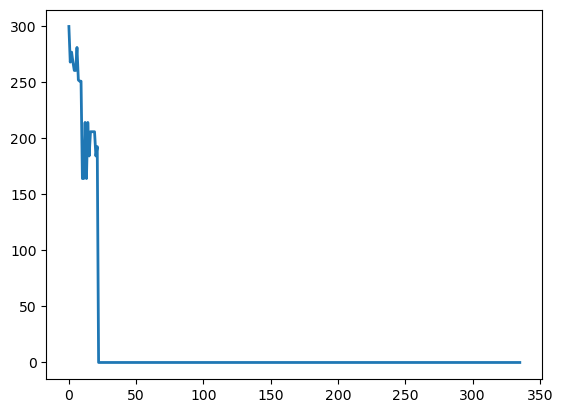

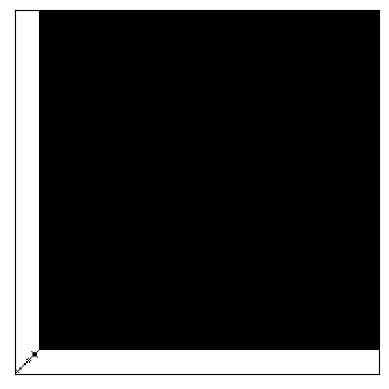

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from pyts.image import RecurrencePlot

y = np.linspace(0,max(lengths),max(lengths))

# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)

a = 57

x = vidcoordinates[a]

#print(vidvalue[a])

X = np.array([x])

plt.plot(y, x, linewidth=2.0)

fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Recurrence plot transformation
rp = RecurrencePlot(threshold=np.pi/18)
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot



# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

40
40


In [8]:
#Denna cell är själva neurala nätverket, så lägg in en till cell under som tar samma input men med annan ML-algoritm

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

import numpy as np

y = np.array(vidvalue)
X = np.array(vidcoordinates)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#X_train, X_test = X_train / 1080.0, X_test / 1080.0
print(X_train)
print(y_train)
#Gammalt

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)


model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train,
           batch_size=25,
           epochs=6,
           verbose=1,
           validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

[[251.46172671 251.46172671 226.31835984 ...   0.           0.
    0.        ]
 [314.49324317 296.98821525 296.98821525 ...   0.           0.
    0.        ]
 [306.757233   268.02425263 314.56795768 ...   0.           0.
    0.        ]
 ...
 [191.63767897 191.63767897 191.63767897 ...   0.           0.
    0.        ]
 [327.78651589 343.11076929 327.14064254 ...   0.           0.
    0.        ]
 [314.49324317 314.49324317 314.49324317 ...   0.           0.
    0.        ]]
[0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1]
Epoch 1/6
3/3 [==============================] - 1s 100ms/step - loss: 21.6470 - accuracy: 0.5600 - val_loss: 35.5524 - val_accuracy: 0.4800
Epoch 2/6
3/3 [==============================] - 0s 22ms/step - loss: 20.4951 - accuracy: 0.6000 - val_loss: 9.6277 - val_accuracy: 0.6800
Epoch 3/6
3/3 [==============================] - 0s 18ms/step - loss: 21.3822 - accura

[9.236358642578125, 0.5600000023841858]

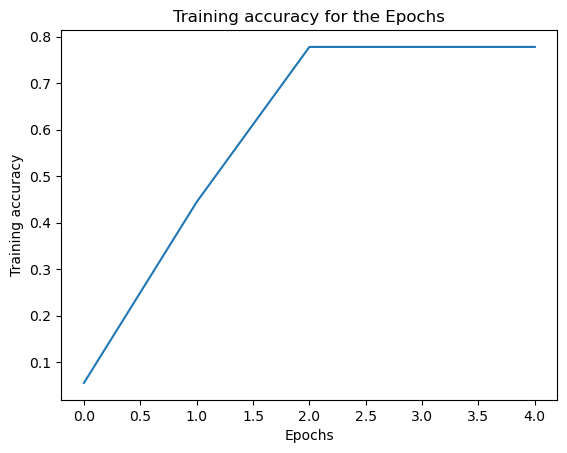

In [52]:
plt.plot(fit_info.history["accuracy"])
plt.title('Training accuracy for the Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')

plt.show()